# Hypothesis Testing 3

Shamelessly stolen from:  
https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb

In [2]:
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """
    
    n = len(data)
    
    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    
    print("p value:%.4f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed") 

In [4]:
def check_variance_homogeneity(group1, group2):
    test_stat, p_val = stats.levene(group1, group2)
    print("p value:%.4f" % p_val)
    if p_val <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

## Post Hoc comparisons

## Q1.
A pediatrician wants to see the effect of formula consumption on the average monthly weight gain (in gr) of babies. For this reason, she collected  data from three different groups. The first group is exclusively breastfed children(receives only breast milk), the second group is children who are fed with only formula and the last group is both formula and breastfed children. These data are as below 


only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]      
   
only_formula=[ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9]     
        
both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3]  
**According to this information, conduct the hypothesis testing to check whether there is a difference between the average monthly gain of these three groups by using a 0.05 significance level. If there is a significant difference, perform further analysis to find what caused the difference.  Before doing hypothesis testing, check the related assumptions. Comment on the results.**

In [5]:
only_breast=np.array([794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1])

only_formula=np.array([ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9])

both=np.array([976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3])

$ H_{0} $: The data is normally distributed.  
$ H_{1} $: The data is not normally distributed. 

In [6]:
check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed


$H_{0}$: The variances of the samples are the same.  
$H_{1}$: The variances of the samples are different. 

In [7]:
stat, pvalue_levene= stats.levene(only_breast,only_formula,both)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.


$H_{0}$: $\mu_{1}= \mu_{2}= \mu_{3} $ **or** The mean of the samples is the same.      
$H_{1}$: At least one of them is different.    

In [8]:
F, p_value = stats.f_oneway(only_breast,only_formula,both)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


**At this significance level, it can be concluded that at least one of the groups has a different average monthly weight gain.**

Perform post-hoc comparisons:

In [ ]:
# Install package
# !pip install scikit-posthocs

In [21]:
# Pairwise T test for multiple comparisons of independent groups. May be used after a parametric ANOVA to do pairwise comparisons.

import scikit_posthocs as sp
posthoc_df= sp.posthoc_ttest([only_breast,only_formula,both], equal_var=True, p_adjust="bonferroni")

group_names= ["only breast", "only formula","both"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,only breast,only formula,both
only breast,1.000000,0.000000,0.129454
only formula,0.000000,1.000000,0.000004
both,0.129454,0.000004,1.000000


In [13]:
# Compute means for each group
means = {
    "only breast": np.mean(only_breast),
    "only formula": np.mean(only_formula),
    "both": np.mean(both)
}

# Calculate mean differences
mean_diff_df = pd.DataFrame(index=group_names, columns=group_names, data=0.0)
for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        if i != j:
            mean_diff_df.loc[group1, group2] = means[group1] - means[group2]

# Combine p-values and mean differences
combined_df = posthoc_df.copy()
for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        if i != j:
            combined_df.loc[group1, group2] = f'p={posthoc_df.loc[group1, group2]:.3f}, diff={mean_diff_df.loc[group1, group2]:.2f}'

# Display combined dataframe with conditional formatting
styled_combined_df = combined_df.style.applymap(lambda x: "background-color: violet" if isinstance(x, str) and float(x.split(',')[0][2:]) < 0.05 else "background-color: white")

# Output results
styled_combined_df

# Display the means for reference
print("Group means:")
for group, mean in means.items():
    print(f'{group}: {mean:.2f}')

Group means:
only breast: 749.82
only formula: 959.22
both: 809.95


In [14]:
styled_combined_df

,only breast,only formula,both
only breast,1.000000,"p=0.000, diff=-209.39","p=0.129, diff=-60.13"
only formula,"p=0.000, diff=209.39",1.000000,"p=0.000, diff=149.26"
both,"p=0.129, diff=60.13","p=0.000, diff=-149.26",1.000000


Therefore:  
only formula > only breast  
only formula > both  
And we cannot compare between both and only breast

--------
## Q2.

An e-commerce company regularly advertises on YouTube, Instagram, and Facebook for its campaigns. However, the new manager was curious about if there was any difference between the number of customers attracted by these platforms. Therefore, she started to use Adjust, an application that allows you to find out where your users come from. The daily numbers reported from Adjust for each platform are as below. 

youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
       
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]     
       
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]          

**According to this information, conduct the hypothesis testing to check whether there is a difference between the average customer acquisition of these three platforms using a 0.05 significance level. If there is a significant difference, perform further analysis to find that caused the difference. Before doing hypothesis testing, check the related assumptions. Comment on the results.** 

In [23]:
youtube=np.array([1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956,
       2146, 2151, 1943, 2125])
       
instagram =  np.array([2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340.,
       2349., 2241., 2396., 2244., 2267., 2281.])
       
facebook = np.array([2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178.,
       2113., 2048., 2443., 2265., 2095., 2528.]) 

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed. 

In [24]:
check_normality(youtube)
check_normality(instagram)
check_normality(facebook)

p value:0.0285
Reject null hypothesis >> The data is not normally distributed
p value:0.4156
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1716
Fail to reject null hypothesis >> The data is normally distributed


$H_{0}$: The variances of the samples are the same.  
$H_{1}$: The variances of the samples are different. 

In [25]:
stat, pvalue_levene= stats.levene(youtube, instagram, facebook)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0012
Reject null hypothesis >> The variances of the samples are different.


$H_{0}$: $\mu_{1}= \mu_{2}= \mu_{3} $ **or** The mean of the samples are same.      
$H_{1}$: At least one of them is different.    

In [26]:
# kruskal test: like Anova, but non-parametric (not assuming any distribution)
F, p_value = stats.kruskal(youtube, instagram, facebook)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000015
Reject null hypothesis


At this significance level, at least one of the median customer acquisition number is different.  
Note: Since, the data is not normal, nonparametric version of posthoc test is used.

In [27]:
# We use Mann-Whitney since the groups are independent (otherwise, use Wilcoxon)
posthoc_df = sp.posthoc_mannwhitney([youtube,instagram, facebook], p_adjust = 'bonferroni')
group_names= ["youtube", "instagram","facebook"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,youtube,instagram,facebook
youtube,1.000000,0.000010,0.002337
instagram,0.000010,1.000000,1.000000
facebook,0.002337,1.000000,1.000000


In [30]:

# Compute medians for each group
medians = {
    "youtube": np.median(youtube),
    "instagram": np.median(instagram),
    "facebook": np.median(facebook)
}

# Calculate median differences
median_diff_df = pd.DataFrame(index=group_names, columns=group_names, data=0.0)
for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        if i != j:
            median_diff_df.loc[group1, group2] = medians[group1] - medians[group2]

# Combine p-values and median differences
combined_df = posthoc_df.copy()
for i, group1 in enumerate(group_names):
    for j, group2 in enumerate(group_names):
        if i != j:
            combined_df.loc[group1, group2] = f'p={posthoc_df.loc[group1, group2]:.3f}, diff={median_diff_df.loc[group1, group2]:.2f}'

# Display combined dataframe with conditional formatting
styled_combined_df = combined_df.style.applymap(lambda x: "background-color: violet" if isinstance(x, str) and float(x.split(',')[0][2:]) < 0.05 else "background-color: white")

# Output results
styled_combined_df

,youtube,instagram,facebook
youtube,1.000000,"p=0.000, diff=-265.00","p=0.002, diff=-253.00"
instagram,"p=0.000, diff=265.00",1.000000,"p=1.000, diff=12.00"
facebook,"p=0.002, diff=253.00","p=1.000, diff=-12.00",1.000000


Therefore:  
We can only conclude that  
facebook > youtube  
instagram > youtube

## Standardized Residuals Analysis for Chi-Square

In [33]:
import numpy as np
from scipy.stats import chisquare, norm

# Example observed and expected frequencies
observed = np.array([50, 30, 20])
expected = np.array([40, 50, 10])

In [34]:
# Step 1: Perform the chi-squared goodness-of-fit test
chi2_stat, p_value = chisquare(observed, expected)
print(f'Chi-squared Statistic: {chi2_stat}, p-value: {p_value}')

Chi-squared Statistic: 20.5, p-value: 3.535750085040998e-05


With significance, at least one expected value is incorrect. Which ones?

**We want to check which categories contributed to our significance result**

In [35]:
# Step 2: Calculate standardized residuals
standardized_residuals = (observed - expected) / np.sqrt(expected)
print("Standardized Residuals:", standardized_residuals)

Standardized Residuals: [ 1.58113883 -2.82842712  3.16227766]


In [36]:
# Step 3: Perform z-tests on standardized residuals
z_scores = standardized_residuals
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed test
significance = p_values < 0.05  # Assuming alpha = 0.05

In [38]:
# Output results for each category
for i, (z, p, sig) in enumerate(zip(standardized_residuals, p_values, significance)):
    print(f'Category {i}: residual = {z:.2f}, p-value = {p:.3f}, significant = {sig}')

Category 0: residual = 1.58, p-value = 0.114, significant = False
Category 1: residual = -2.83, p-value = 0.005, significant = True
Category 2: residual = 3.16, p-value = 0.002, significant = True


This means that categories 1 and 2 contributed to our significance result.  
In Category 1 the residual is negative and p-value is significant,  
therefore, we expect to have more observations than the given expected value of 40.  
  
In Category 2 the resisual is positive and p-value is significant,  
therefore, we expect to have less observations than the given expected value of 20.

## Correlations

### Pearson correlation coefficient

**Pearson Correlation Coefficient: Measures the linear relationship between x and y.**  
  
**Pearson p-value: Tests the null hypothesis that there is no linear relationship between x and y  
and assumes normaility**

In [40]:
import numpy as np
from scipy.stats import pearsonr

# Example data
np.random.seed(42)
x = np.random.rand(100)  # Random data for variable x
y = 0.5 * x + np.random.rand(100) * 0.1  # Random data for variable y, linearly related to x

# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(x, y)

print(f'Pearson correlation coefficient: {corr_coefficient:.3f}')
print(f'Significance (p-value): {p_value:.3f}')

Pearson correlation coefficient: 0.981
Significance (p-value): 0.000


**Spearman Correlation Coefficient: Measures the monotonic relationship between x and y, useful if data are not normally distributed.**  
  
**Spearman p-value: Tests the null hypothesis that there is no monotonic relationship between x and y.**

In [42]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(x, y)

print(f'Spearman correlation coefficient: {spearman_corr:.3f}')
print(f'Significance (p-value): {spearman_p_value:.3f}')

Spearman correlation coefficient: 0.980
Significance (p-value): 0.000


### Linear Regression

#### Data generation

$$Y = 3 \cdot X + 4 + \epsilon \\ \epsilon \sim  \mathcal{N}(0,1)$$

In [62]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_test = 2 * np.random.rand(30, 1)
y_test = 4 + 3 * X_test + np.random.randn(30, 1)

In [63]:
from sklearn.linear_model import LinearRegression
# include intercept
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07947894]), array([[3.11742503]]))

In [64]:
# predictions
f'prediction: {lin_reg.predict(X[:1,:])[0][0]} actual: {y[:1][0][0]}'

'prediction: 5.636121533816815 actual: 4.665652480050887'

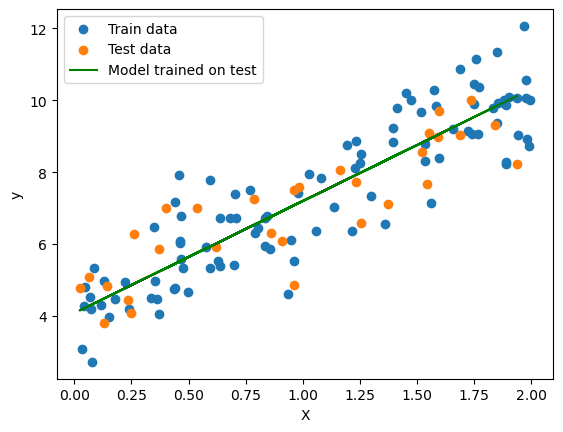

In [65]:
plt.scatter(X, y, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_test, lin_reg.predict(X_test), label='Model trained on test', color='g')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [66]:
from sklearn.metrics import r2_score

train_predictions = lin_reg.predict(X)
test_predictions =  lin_reg.predict(X_test)

train_r2 = r2_score(y_true=y,y_pred=train_predictions)
r2 = r2_score(y_true=y_test,y_pred=test_predictions)
print(f"""
    train R2: {train_r2}
    test R2: {r2}
""")


    train R2: 0.8109532873272212
    test R2: 0.7092204768131307



### Logistic Regression

In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
# inline plot 
%matplotlib inline  
# default figure size 
matplotlib.rcParams['figure.figsize'] = (20, 10)
# to make our sets reproducible 
np.random.seed(42) 

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()

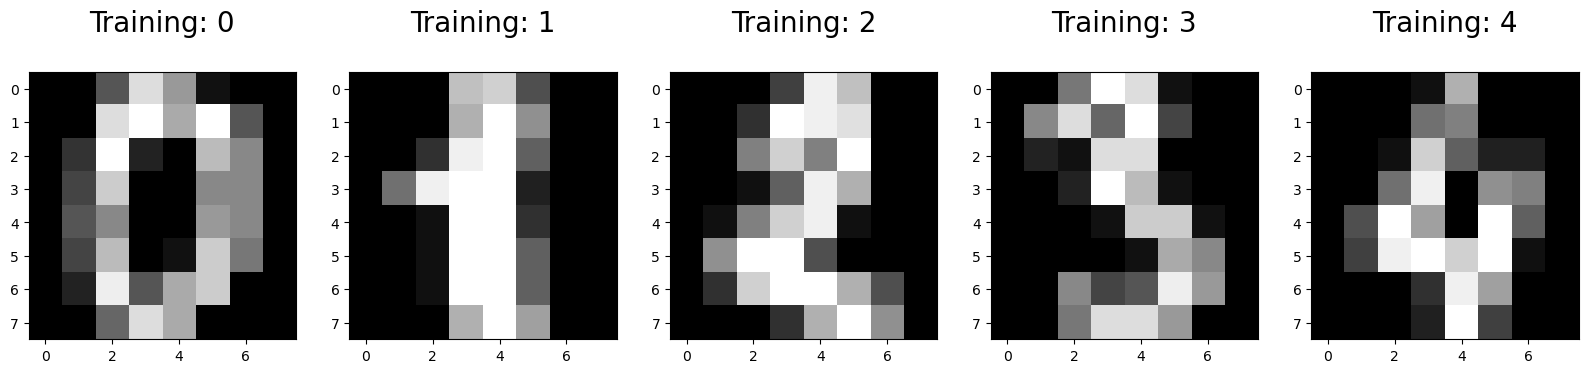

In [70]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [72]:
X_train.shape

(1347, 64)

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [80]:
clf.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [81]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
y_pred = clf.predict(X_test)

In [86]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy in test data is: {acc}")

Accuracy in test data is: 0.9533333333333334
